## Importación de librerías

In [ ]:
#Tratamiento de datos
import pandas as pd
import numpy as np

#Visualizaciones
import matplotlib.pyplot as plt     
import seaborn as sns 

## Carga de datos

Vamos a tratar las columnas de fechas `dateCrawled`, `dateCreated`,`lastSeen` como tipo de dato Datetime

In [2]:
df = pd.read_csv("../data/raw/autorenew.csv", parse_dates=["dateCrawled", "dateCreated","lastSeen"])

## Análisis preliminar

In [3]:
df.sample(10)

,dateCrawled,name,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
254904,2016-03-08 16:50:11,Mercedes_Benz_220,private,offer,1500,NaN,1999,manually,123.0,andere,150000,2,diesel,mercedes_benz,no,2016-03-08,0,29439,2016-03-11 11:45:51
216267,2016-03-22 19:51:37,OPEL_VECTRA_B_CARAVAN_KOMBI,private,offer,900,combi,1998,manually,99.0,vectra,150000,11,petrol,opel,NaN,2016-03-22,0,44651,2016-04-06 13:16:20
351613,2016-03-11 12:37:43,Passat_Kombi_1.9_TDI_4Motion_Highline,private,offer,2200,combi,2003,NaN,0.0,passat,150000,11,diesel,volkswagen,no,2016-03-11,0,46149,2016-03-11 12:37:43
10090,2016-03-25 14:38:48,Golf5_4motion_2_0_unfall,private,offer,2100,NaN,2005,manually,138.0,golf,150000,1,diesel,volkswagen,yes,2016-03-25,0,44147,2016-04-02 17:47:43
121852,2016-03-05 14:21:44,Fiat_stilo_abarth_mit_pleuellagerschaden,private,offer,300,NaN,2005,automatic,168.0,stilo,150000,0,NaN,fiat,yes,2016-03-04,0,56332,2016-04-06 00:47:02
46284,2016-03-27 16:06:18,Fiat_Punto_188____1.4_16v_mit_95_ps,private,offer,800,NaN,2003,manually,94.0,punto,150000,10,petrol,fiat,yes,2016-03-27,0,55130,2016-03-28 16:35:34
311060,2016-03-29 18:50:40,BMW_E46_320_D__Vollleder__sehr_gepflegt,private,offer,5490,NaN,2004,automatic,148.0,3er,150000,9,diesel,bmw,no,2016-03-29,0,41515,2016-04-06 04:45:49
3453,2016-03-27 00:58:37,Volkswagen_Golf_1.9_TDI_Sportline,private,offer,5200,NaN,2004,manually,104.0,golf,150000,3,diesel,volkswagen,no,2016-03-26,0,91623,2016-04-07 04:17:05
328280,2016-03-17 14:56:09,Ford_scopio_zu_verkaufen,private,offer,250,NaN,1996,automatic,134.0,andere,150000,2,petrol,ford,NaN,2016-03-17,0,37619,2016-04-06 22:45:43
67642,2016-04-01 19:57:27,Volkswagen_Passat_Variant_1.9_TDI,private,offer,3100,combi,2005,manually,129.0,passat,150000,3,diesel,volkswagen,no,2016-04-01,0,8606,2016-04-03 17:44:40


In [4]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 371528 filas y 19 columnas


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371528 non-null  datetime64[ns]
 1   name                 371528 non-null  object        
 2   seller               371528 non-null  object        
 3   offerType            371528 non-null  object        
 4   price                371528 non-null  int64         
 5   vehicleType          237765 non-null  object        
 6   yearOfRegistration   371528 non-null  int64         
 7   gearbox              351319 non-null  object        
 8   powerCV              371528 non-null  float64       
 9   model                351044 non-null  object        
 10  kilometer            371528 non-null  int64         
 11  monthOfRegistration  371528 non-null  int64         
 12  fuelType             338142 non-null  object        
 13  brand         

## Columnas del Dataset

- **`dateCrawled`** fecha y hora en la que se han recopilado los datos del coche
- **`name`** nombre del anuncio, incluye marca y modelo del coche.
- **`seller`** Tipo de vendedor (Particular o concesionario)
- **`offerType`** tipo de oferta (venta o subasta)
- **`price`** precio del coche, no sabemos la divisa
- **`vehicleType`** tipo vehiculo, (sedán , SUV, compacto...)
- **`yearOfRegistration`** año de matriculación del coche
- **`gearbox`** Tipo de transmisión, (manual o automática)
- **`powerCV`** Potencia del coche en caballos (CV)
- **`model`** Modelo del coche
- **`kilometer`** kilometraje total del coche
- **`monthOfRegistration`** Mes de matriculación
- **`fuelType`** Tipo de combustible (gasolina, diese, electrico...)
- **`brand`** Marca del coche
- **`notRepairedDamage`** Indica si el coche tiene daños sin reparar
- **`dateCreated`** Fecha de creacion (anuncio)
- **`nrOfPictures`** Número de fotos (anuncio)
- **`postalCode`** Código postal de la ubicación del coche
- **`lastSeen`** Última fecha y hora en la se visualizó el anuncio


### Análisis de fechas
Comprobar los valores únicos de los años para conocer el intervalo de tiempo

In [6]:
columnas_fechas = ['dateCrawled', 'dateCreated', 'lastSeen']

for col in columnas_fechas:
     print(f"Valores únicos de los años para {col}: {df[col].dt.year.unique()}")

Valores únicos de los años para dateCrawled: [2016]
Valores únicos de los años para dateCreated: [2016 2015 2014]
Valores únicos de los años para lastSeen: [2016]


- Los datos se extrajeron exclusivamente en 2016
- Los anuncios son entre 2014 y 2016
- Asumeremos que los vehiculos mass nuevos solo pueden ser de 2016 en lugar del año actual
- Aparte de eso, estas columnas no aportan valor adicional, por tanto, las eliminaremos

In [7]:
df = df.drop(columns=columnas_fechas)

## Duplicados

Ahora que hemos eliminado las fechas, comprobemos los duplicados. Es posible que un mismo vehículo haya sido registrado múltiples veces en diferentes fechas.

In [8]:
df.duplicated().sum()

6624

In [9]:
round(df.duplicated().mean() * 100, 2)

1.78

Hay 6624 duplicados (1.78 %), los eliminamos.

In [10]:
df = df.drop_duplicates()

## Valores nulo
Comprobar el total de valores nulos del dataset

In [11]:
nulos = df.isna().sum()
nulos[nulos > 0]

vehicleType          131462
gearbox               19806
model                 20294
fuelType              33084
notRepairedDamage     70776
dtype: int64

Veamos si son muchos o pocos nulos

In [12]:
nulos_porc = df.isna().mean() * 100
nulos_porc[nulos_porc > 0].round(2)

vehicleType          36.03
gearbox               5.43
model                 5.56
fuelType              9.07
notRepairedDamage    19.40
dtype: float64

Vemos que hay pocas columnas con valores nulos, de las cuales:
- `gearbox` y `model`: apenas un 5%, pocos nulos
- `fuelType`: un 9%, pocos nulos
- `notRepairedDamage`: 19% de nulos, cantidad moderada
- `vehicleType`: 36%, cantidad alta          

## Variables numéricas

In [13]:
columnas_num = df.select_dtypes(include='number').columns
columnas_num

Index(['price', 'yearOfRegistration', 'powerCV', 'kilometer',
       'monthOfRegistration', 'nrOfPictures', 'postalCode'],
      dtype='object')

In [14]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
price,364904.0,17502.27,3620372.48,0.0,1150.0,2950.0,7150.0,2.147484e+09
yearOfRegistration,364904.0,2004.58,93.55,1000.0,1999.0,2003.0,2008.0,9.999000e+03
powerCV,364904.0,113.93,190.97,0.0,69.0,104.0,148.0,1.972600e+04
kilometer,364904.0,125685.07,40090.32,5000.0,125000.0,150000.0,150000.0,1.500000e+05
monthOfRegistration,364904.0,5.73,3.71,0.0,3.0,6.0,9.0,1.200000e+01
nrOfPictures,364904.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000000e+00
postalCode,364904.0,50944.55,25775.64,1067.0,30655.0,49688.0,71642.0,9.999800e+04


Observaciones variables numéricas
- `price`:El precio mínimo es cero, un coche gratis no tiene sentido. La media es mucho mayor que la mediana, lo que puede indicar la presencia de numerosos valores atípicos, posiblemente vehiculos de lujo. Precio maximo es un valor incoherente (1e9 mil millones) probablementes debido a errores.
- `yearOfRegistration`: El valor mínimo es 1000 valor incoherente, tambien hay valores de 9999 posibles errores en la introducción de datos
- `powerCV`:valores min y max incoherentes (0 y 19.700).El resto parecen razonables, estando en un rantgo típico entre 50 y 150 CV
- `kilometer`: Valores que parecen razonables, media y mediana similares, sugiere una distribución mas uniforme.
- `monthOfRegistration`: Es un falso numérico, variable categórica. Valor minimo en cero es imposible
- `nrOfPictures`: Todos los valores son 0, la eliminamos
- `postalCode` : Codigos postales, realmente variable categórica. no tenemos informacion sobre el pais al que pertenecen, ni una forma de determinarlo, lo que limita su utilidad para el análisis. Por el nombre de algunas entradas sospechamos que podria ser Alemania, al no tener forma de confirmarlo, decidimos eliminarla.


In [15]:
df = df.drop(columns=['postalCode', 'nrOfPictures'])

## Histogramas

In [17]:
columnas_num = df.select_dtypes(include='number').columns

c:\Users\mctra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


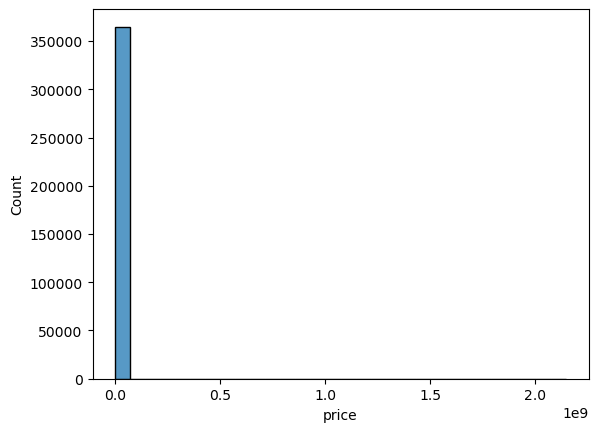

c:\Users\mctra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


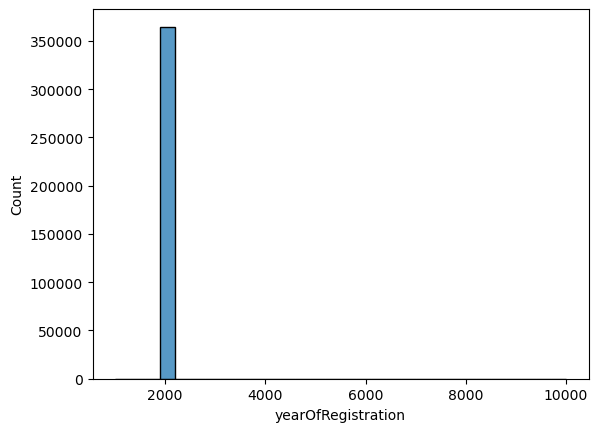

c:\Users\mctra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


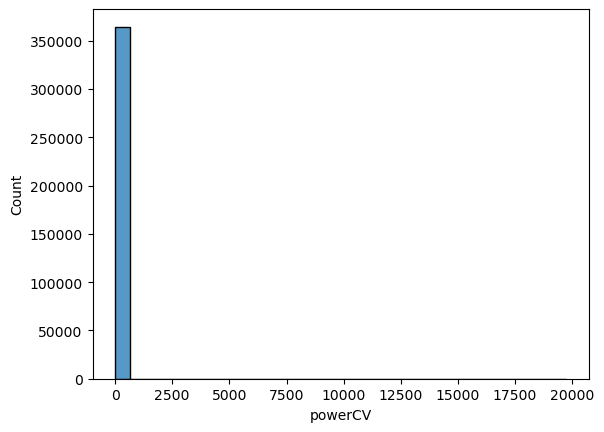

c:\Users\mctra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


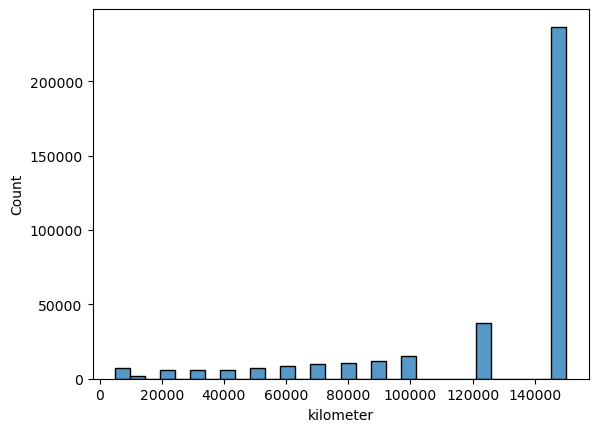

c:\Users\mctra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


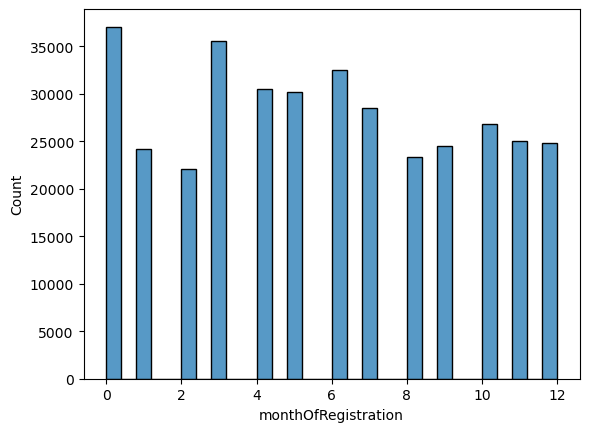

In [18]:
for col in columnas_num:

     plt.figure()
     sns.histplot(df[col], bins=30)
     plt.show()

## Boxplot

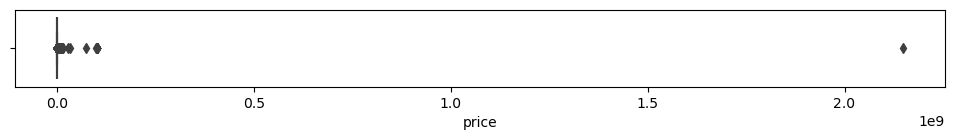

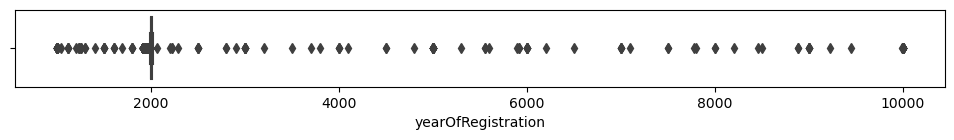

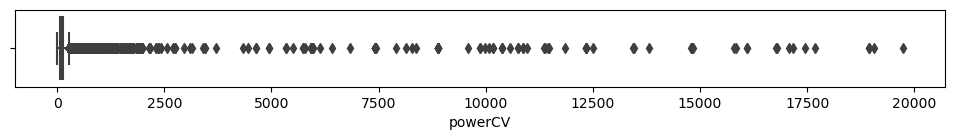

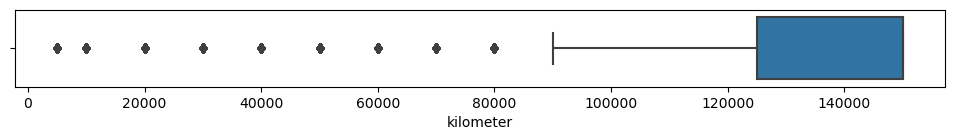

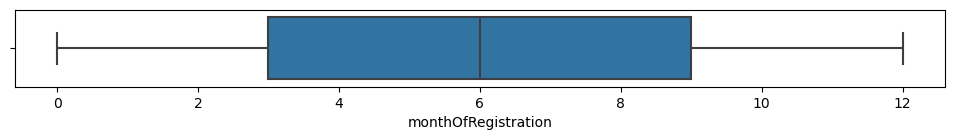

In [19]:
for col in columnas_num:

     plt.figure(figsize=(12, 1))
     sns.boxplot(x=df[col])
     plt.show()

## Columnas categóricas


In [21]:
df.describe(include=['category','object']).T

,count,unique,top,freq
name,364904,233531,Ford_Fiesta,650
seller,364904,2,private,364901
offerType,364904,2,offer,364892
vehicleType,233442,7,small car,78621
gearbox,345098,2,manually,269737
model,344610,251,golf,29539
fuelType,331820,7,petrol,220299
brand,364904,40,volkswagen,78227
notRepairedDamage,294128,2,no,258291


In [23]:
columnas_cat = df.select_dtypes(include=['category','object']).columns
columnas_cat

Index(['name', 'seller', 'offerType', 'vehicleType', 'gearbox', 'model',
       'fuelType', 'brand', 'notRepairedDamage'],
      dtype='object')

In [37]:
for col in columnas_cat:
     print(f"La columna {col} tiene un total de {df[col].nunique()} valores distintos\n")
     print(f"Los 10 valores mas repetidos son:")
     display(df[col].value_counts(dropna=False).head(10))
     print("____________________________________")

La columna name tiene un total de 233531 valores distintos

Los 10 valores mas repetidos son:


name
Ford_Fiesta            650
BMW_318i               623
Opel_Corsa             614
Volkswagen_Golf_1.4    598
BMW_316i               515
BMW_320i               490
Volkswagen_Polo        471
Renault_Twingo         444
Volkswagen_Golf        427
Volkswagen_Golf_1.6    411
Name: count, dtype: int64

____________________________________
La columna seller tiene un total de 2 valores distintos

Los 10 valores mas repetidos son:


seller
private       364901
commercial         3
Name: count, dtype: int64

____________________________________
La columna offerType tiene un total de 2 valores distintos

Los 10 valores mas repetidos son:


offerType
offer      364892
request        12
Name: count, dtype: int64

____________________________________
La columna vehicleType tiene un total de 7 valores distintos

Los 10 valores mas repetidos son:


vehicleType
NaN            131462
small car       78621
combi           66264
bus             29640
convertible     22592
coupe           18757
suv             14249
other            3319
Name: count, dtype: int64

____________________________________
La columna gearbox tiene un total de 2 valores distintos

Los 10 valores mas repetidos son:


gearbox
manually     269737
automatic     75361
NaN           19806
Name: count, dtype: int64

____________________________________
La columna model tiene un total de 251 valores distintos

Los 10 valores mas repetidos son:


model
golf        29539
andere      26078
NaN         20294
3er         20286
polo        12930
corsa       12360
astra       10595
passat      10077
a4          10026
c_klasse     8605
Name: count, dtype: int64

____________________________________
La columna fuelType tiene un total de 7 valores distintos

Los 10 valores mas repetidos son:


fuelType
petrol     220299
diesel     105088
NaN         33084
lpg          5287
cng           561
hybrid        275
other         207
electro       103
Name: count, dtype: int64

____________________________________
La columna brand tiene un total de 40 valores distintos

Los 10 valores mas repetidos son:


brand
volkswagen       78227
bmw              39567
opel             39359
mercedes_benz    34681
audi             32144
ford             25092
renault          17651
peugeot          10805
fiat              9511
seat              6908
Name: count, dtype: int64

____________________________________
La columna notRepairedDamage tiene un total de 2 valores distintos

Los 10 valores mas repetidos son:


notRepairedDamage
no     258291
NaN     70776
yes     35837
Name: count, dtype: int64

____________________________________


### Observaciones variables categóricas
 - `name`
    - 233531 valores distintos
    - Valores más repetidos (Ford_Fiesta, BMW_318i, Opel_Corsa  )
  - `seller`
    - 2 valores únicos (private, comercial)
    - Destaca private con mas de 364000 registros
    - Comercial, solo 3 registros, no es significativo para el analisis
  - `offerType`
    - 2 valores unicos (offer, request)
    - offer destaca con mas de 364000
    - request solo 12 registros, no es significativo para el analisis
  - `vehicleType`
    - 7 valores distintos(small car, combi, bus, convertible, coupe, suv, other)
    - Mas destacado es nan
  - `gearbox`
    - 2 valores únicos (manually , automatic)
    - Valor mas destacado manually
    - casi 20000 nan
  - `model`
    - 251 valores distintos
    - Los dos más destacados son golf y andere
  - `fuelType`
    - 7 valores distintos(petrol, diesel, lpg, cng, hybrid, other, electro )
    - el mas destacado es petros doblando la cantidad de registros del siguiente(diesel)
    - mas de 30000 nan
  -`brand`
    - 40 valores distintos
    - el más destacado volkswagen
  - `notRepairedDamage`
    - 2 valores distintos (no, yes)
    - Destaca no
    - mas de 70000 nan


### Countplot

Columna name tiene demasiadas categorías 233531


Distribución de la columna seller


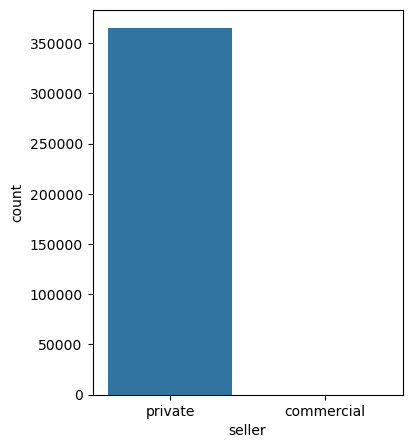

Distribución de la columna offerType


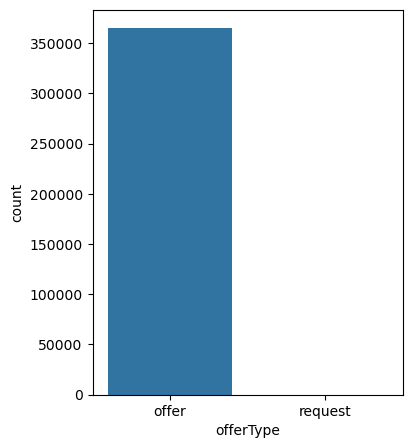

Distribución de la columna vehicleType


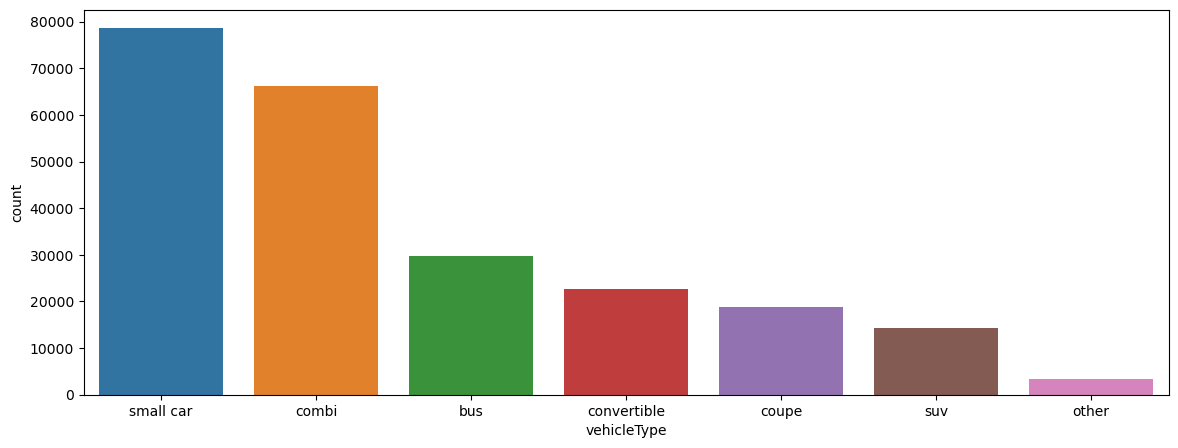

Distribución de la columna gearbox


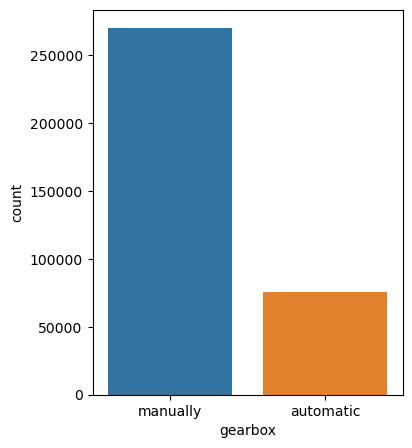

Columna model tiene demasiadas categorías 251


Distribución de la columna fuelType


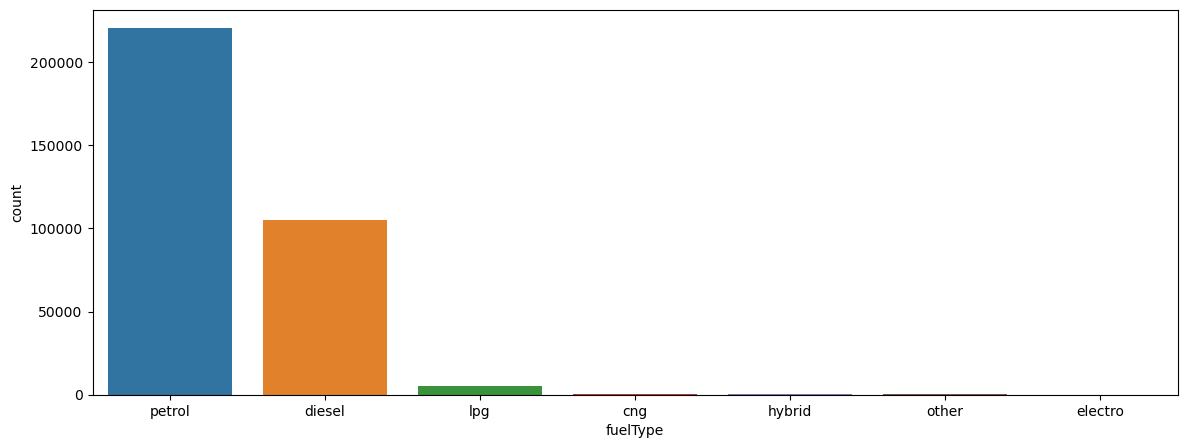

Distribución de la columna brand


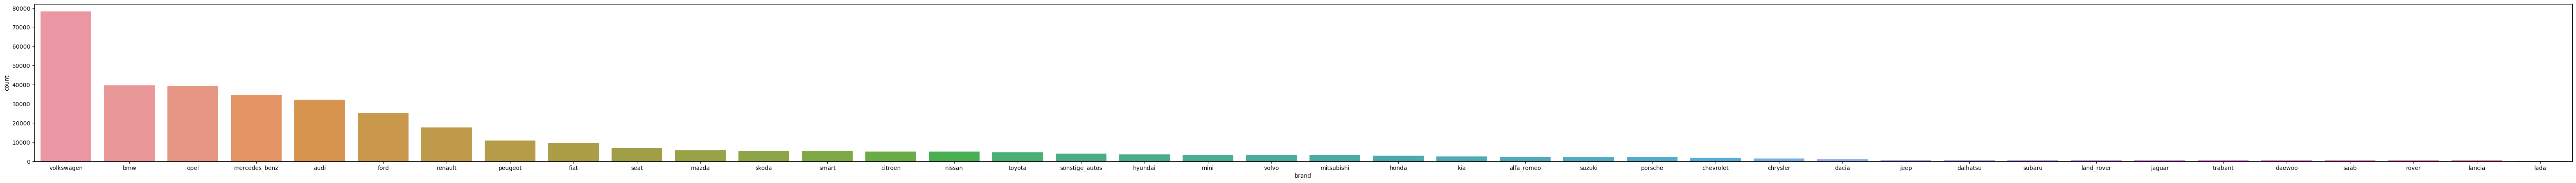

Distribución de la columna notRepairedDamage


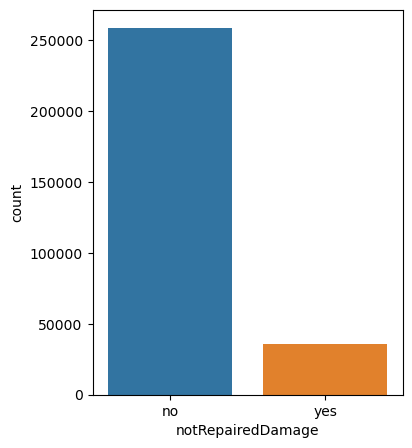

In [55]:
for col in columnas_cat:
     if df[col].nunique() > 200:
          print(f"Columna {col} tiene demasiadas categorías {df[col].nunique()}\n\n")
          continue
     
     print(f"Distribución de la columna {col}")
     plt.figure(figsize=(df[col].nunique() * 2 , 5))
     sns.countplot(x=df[col], order=df[col].value_counts().index)
     plt.show()
     